__Factors that affect the ranking of a university most in 2018-2019__
==

## 1. Introduction

   There are many factors that can affect one's choice of the university they are going to pursue, such as the location, the tuition or the program, and, in many cases, the reputation of a school. Students can find several national and international university ranking web pages that provide them either overall rankings or the breakdown of different parameters that contribute to the ranking of a school. However, it is still unclear what the most important criteria that make the overall quality of a school are. Students that only look into general rankings to decide what university to attend can be misled by the information provided by these ranking websites. In addition, certain aspects of an educational institute can be one student's interest but not the other's. It is important that students who consult university ranking websites are acknowledged of what aspects the ranking systems are based on.  Since there are numerous ranking websites using different ranking systems, but little has reference sources, it is essential to comprehend where the data come from to make the right judgement of the information that the data imply.


 To investigate the factors that dictate the ranking system of some common ranking webpages, we looked into statistics of ‘World University Rankings 2018-2019’, retrieved from The Center for World University Rankings website (CWUR). This website claimed to be “a leading consulting organization providing policy advice, strategic insights, and consulting services to governments and universities to improve educational and research outcomes". In addition, we are also interested in the worldwide distribution of high-ranked universities around the world. Therefore, we analyzed the retrieved data and investigate countries with highest-ranked universities. This information shall be useful for students who are interested in studying abroad and would like to earn globally-recognized degrees. 

The data retrieved from CWUR World not only give an overall world rank of each of one thousand highest-ranked institutions, it also includes factors such as quality of education,	alumni employment, quality of faculty, research output, quality of publications, influence and citations. Each element is described below:
<br /> 
<br /> 
1) Quality of Education, measured by the number of a university's alumni who have won major international awards, prizes, and medals relative to the university's size (15%). 
<br /> 
2) Alumni Employment, measured by the number of a university's alumni who have held CEO positions at the world's top companies relative to the university's size (15%).
<br /> 
3) Quality of Faculty, measured by the number of academics who have won major international awards, prizes, and medals (15%) 
<br /> 
4) Research Output, measured by the the total number of research papers (15%) 
<br /> 
5) Quality Publications, measured by the number of research papers appearing in top-tier journals (15%) 
<br /> 
6) Influence, measured by the number of research papers appearing in highly-influential journals (15%)
<br /> 
7) Citations, measured by the number of highly-cited research papers (10%)


The data is claimed to not relying on surveys or university data submissions. With one thousand different institutions in the list, CWUR offer the largest academic ranking of global universities. The data also provide information of national ranks of each institution; however, it is unclear if the national ranks provided in this set of data were evaluated differently from world ranks, that is, whether national ranks follow a different ranking system, or not. Therefore, to clarify this confusion, we looked into the correspondence between world ranks and national ranks.

## 2. Methods and Results

 R programming pakages that were used to facilitate the analysis of the data including rvest and dplyr.

In [154]:
library(rvest)
library(dplyr)

The full data table were obtained from CWUR website and were assigned as 'fullrdata'. This table includes the full list of 1000 different institutions. This data set was analysed to investigate the top countries that have the most institutions in this top-1000-list.

In [125]:
ranks = read_html('https://cwur.org/2018-19.php')
ranks %>% html_nodes('table')
fullrdata = ranks %>% html_nodes('table') %>% .[[1]] %>%
  html_table()
col = names(fullrdata)
names(fullrdata) = make.names(col)

 However, this full data set does not contain all the values for other variables, that is, the table contains some empty cells, which interfere with our analysis process. In order to conduct our data analysis efficiently, we omitted subjects that contain missing values. The new filtered data was assigned as 'rdata'.

In [169]:
rdata = filter(fullrdata, Quality.of.Education != '-' & Alumni.Employment != '-' & Quality.of.Faculty!= '-' & Research.Output!= '-' & Quality..Publications!= '-' & Influence!= '-' &Citations!= '-')
rdata = na.omit(rdata)
head(rdata)

World.Rank,Institution,Location,National.Rank,Quality.of.Education,Alumni.Employment,Quality.of.Faculty,Research.Output,Quality..Publications,Influence,Citations,Score
1,Harvard University,USA,1,2,1,1,1,1,1,1,100.0
2,Stanford University,USA,2,10,3,2,10,4,3,2,96.7
3,Massachusetts Institute of Technology,USA,3,3,11,3,30,15,2,6,95.1
4,University of Cambridge,United Kingdom,1,5,19,6,12,8,6,19,94.0
5,University of Oxford,United Kingdom,2,9,25,10,9,5,7,4,93.2
6,"University of California, Berkeley",USA,4,7,52,5,18,12,4,8,92.5


After the filtration of full data table, our new table were cut down to a list of 223 schools instead of 1000 in the orginal table. 

In [156]:
nrow(rdata)
nrow(fullrdata)

[1] 223

[1] 1000

These numbers showed that only 22.3% of the original data had all variables evaluated and ranked.  

In addition to data filtration, we also noticed that any ranking of variables that was greater than 1000 was marked as '>1000' instead of the exact ranking position. For the ease of data analysis, we replaced '>1000' with '1000' before preceding with our studies.

In [158]:
#turn '>1000' -> '1000' in order to analyse data numerically
for (i in 1:nrow(rdata)){
    for (j in 1:ncol(rdata)){
        if (rdata[i,j] == '> 1000'){
            rdata[i,j] = 1000
        }
    }
}
head(rdata)

World.Rank,Institution,Location,National.Rank,Quality.of.Education,Alumni.Employment,Quality.of.Faculty,Research.Output,Quality..Publications,Influence,Citations,Score
1,Harvard University,USA,1,2,1,1,1,1,1,1,100.0
2,Stanford University,USA,2,10,3,2,10,4,3,2,96.7
3,Massachusetts Institute of Technology,USA,3,3,11,3,30,15,2,6,95.1
4,University of Cambridge,United Kingdom,1,5,19,6,12,8,6,19,94.0
5,University of Oxford,United Kingdom,2,9,25,10,9,5,7,4,93.2
6,"University of California, Berkeley",USA,4,7,52,5,18,12,4,8,92.5


In [141]:
WR_USA = rdata$World.Rank[rdata$Location == 'USA']
NR_USA = rdata$National.Rank[rdata$Location == 'USA']
WR = rdata$World.Rank
NR = rdata$National.Rank
LO = rdata$Location
QE = rdata$Quality.of.Education
AE = rdata$Alumni.Employment
QF = rdata$Quality.of.Faculty
RO = rdata$Research.Output
QP = rdata$Quality..Publications
IN = rdata$Influence
CI = rdata$Citations
SC = rdata$Score

### 2.1. Countries that have most schools in top-1000 list:

Our analysis showed that USA has the most school in the list. The top 10 of the this list include USA, China, United Kingdom, France, Japan, Germany, Italy, Spain, South Korea and Canada, descendingly.

In [474]:
country_list = sort(table(fullrdata$Location), decreasing = TRUE)
country_list = as.data.frame(country_list)
country_list = setNames(object = country_list, c('Country', 'Freq'))
head(country_list)

Country,Freq
USA,213
China,108
United Kingdom,62
France,58
Japan,56
Germany,54


_Table. 1. Countries with most schools in top-1000-list of best institutions_

### 2.2. Correlation between global rank and national rank:

Since we were unsure whether the national rank was obtained from other source or from the same evaluation method of world rank, we examine the world rank and national rank of schools in USA to determine if they are in the exact same order, that is, if a school has higher world rank, it also has higher national rank. Since the world rank is already in ascending order (1 is highest and 1000 is the lowest ranking), if the list of national rank of a country is in the same order, we can conclude that national rank is in agreement with world rank. We examined USA national rank as this country has the most school in the list. Our result showed that the national ranking follow the exact order corresponding with world ranking.

In [167]:
# Examine if global rank is out of order 
is.unsorted(WR_USA)
# Examine if national rank is out of order
is.unsorted(NR_USA)

[1] FALSE

[1] FALSE

### 2.3. Variables that correlate most to the ranking:

In order the determine the factor that contribute most to the overall ranking, we calculated the correlation coefficient between world rank and other variables.

In [172]:
#Correlation coefficient list
cclist = rep(list(),7)

In [181]:
#Variables list
vlist = c('Quality.of.Education', 'Alumni.Employment', 'Quality.of.Faculty', 'Research.Output', 'Quality..Publications', 'Influence', 'Citations')

In [196]:
#World Rank vs Quality of Education
cclist[[1]] = cor(WR,as.numeric(QE))
#World Rank vs Alumni Employment
cclist[[2]] = cor(WR, as.numeric(AE))
#World Rank vs Quality of Faculty
cclist[[3]] = cor(WR, as.numeric(QF))
#World Rank vs Research Output
cclist[[4]] = cor(WR, as.numeric(RO))
#World Rank vs Quality of Publication
cclist[[5]] = cor(WR, as.numeric(QP))
#World Rank vs Influence
cclist[[6]] = cor(WR, as.numeric(IN))
#World Rank vs Citation
cclist[[7]] = cor(WR, as.numeric(CI))

In [204]:
cclist = as.character(cclist)

In [257]:
cor_table = data.frame(vlist, cclist)
cor_table = setNames(object = cor_table, c('Variable', 'Correlation.Coefficient'))

In [259]:
#Arrange the table based on the descending order of correlation coefficient
arrange(cor_table, desc(Correlation.Coefficient))

Variable,Correlation.Coefficient
Quality..Publications,0.93603888403313
Influence,0.919680900143383
Citations,0.901851598838739
Research.Output,0.86791478384934
Quality.of.Faculty,0.504842340108242
Quality.of.Education,0.424577547468939
Alumni.Employment,0.336292658853758


_Table.2. Correlation coefficient between World Ranks and different variables._

According to our analysis, the quality of publications of an institution is the most important variable that dictate its ranking, followed by the amount of influence, citations and research output. The variables that have least influence on the ranking scheme is the level of alumni employment and quality of education.

To visualize the differences between the overal rank and the factors that contribute to ranking evaluation, we plotted the relationship with trend line for each variable.

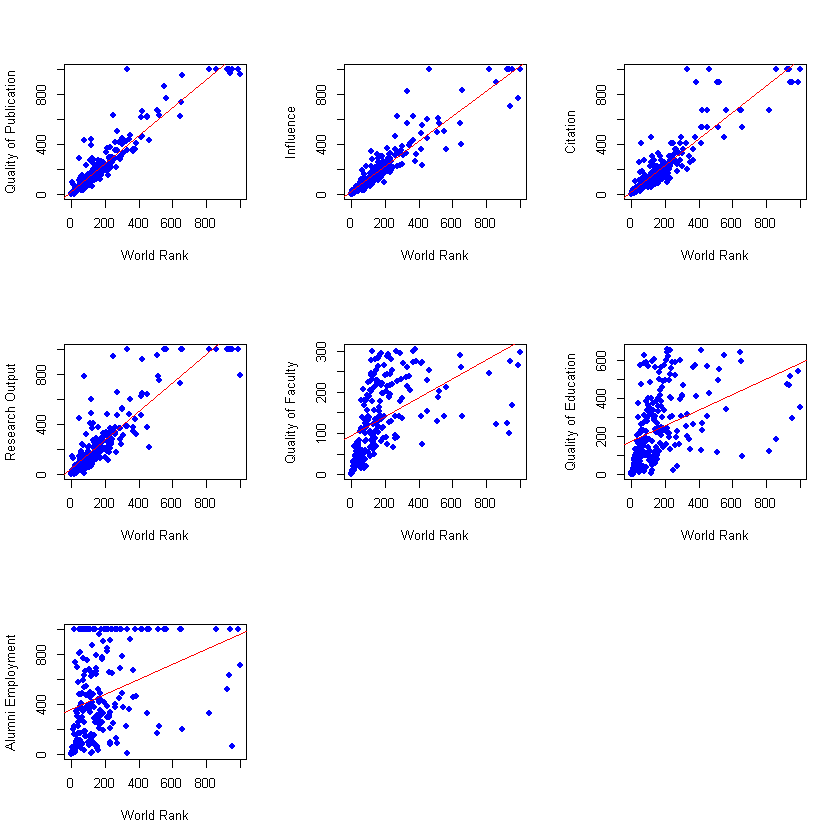

In [305]:
par(mfrow=c(3,3))
plot(WR, QP, col = 'blue', pch = 16, xlab = 'World Rank', ylab = 'Quality of Publication')
abline(lm(QP ~ WR), col = 'red')
plot(WR, IN, col = 'blue', pch = 16,  xlab = 'World Rank', ylab = 'Influence')
abline(lm(IN ~ WR), col = 'red')
plot(WR, CI, col = 'blue', pch = 16, xlab = 'World Rank', ylab = 'Citation')
abline(lm(CI ~ WR), col = 'red')
plot(WR, RO, col = 'blue', pch = 16,  xlab = 'World Rank', ylab = 'Research Output')
abline(lm(RO ~ WR), col = 'red')
plot(WR, QF, col = 'blue', pch = 16,  xlab = 'World Rank', ylab = 'Quality of Faculty')
abline(lm(QF ~ WR), col = 'red')
plot(WR, QE, col = 'blue', pch = 16, xlab = 'World Rank', ylab = 'Quality of Education')
abline(lm(QE ~ WR), col = 'red')
plot(WR, AE, col = 'blue', pch = 16,  xlab = 'World Rank', ylab = 'Alumni Employment')
abline(lm(AE ~ WR), col = 'red')

_Figure.1. Correlation of World Rank and other variables_

## 3. Discussion:

We obtained a table of continents and their countries and joined this table with our previous ranking by country to see the distribution of high-rank schools among different continents. 

In [469]:
countries = read.csv("countries.txt")
head(countries)

Continent,Country
Africa,Algeria
Africa,Angola
Africa,Benin
Africa,Botswana
Africa,Burkina
Africa,Burundi


In [449]:
countries$Continent = as.character(countries$Continent)
countries$Country = as.character(countries$Country)

In [463]:
Country_Continent = left_join(fullrdata, countries, by=c("Location"="Country")) 

In [465]:
# R did not recognize South Korea and Taiwan, but we know these are countries in Asia
head(Country_Continent)

NULL

World.Rank,Institution,Location,National.Rank,Quality.of.Education,Alumni.Employment,Quality.of.Faculty,Research.Output,Quality..Publications,Influence,Citations,Score,Continent
1,Harvard University,USA,1,2,1,1,1,1,1,1,100.0,North America
2,Stanford University,USA,2,10,3,2,10,4,3,2,96.7,North America
3,Massachusetts Institute of Technology,USA,3,3,11,3,30,15,2,6,95.1,North America
4,University of Cambridge,United Kingdom,1,5,19,6,12,8,6,19,94.0,Europe
5,University of Oxford,United Kingdom,2,9,25,10,9,5,7,4,93.2,Europe
6,"University of California, Berkeley",USA,4,7,52,5,18,12,4,8,92.5,North America


Our summary table (Table.3) showed that although USA has the most high-ranked school as a country, Europe as a continent has the most schools (384 not including Russia) that made it to this top-1000 list. North America come second with 245 schools, and Asia come third with 239 schools (not including Russia). These 3 continents significantly outnumber other continents such Africa, Oceania and South America in terms of institutions number in this list. This data is, to some extend, correlated with current study-abroad trends around the world. Specifically, USA has always been the most common country option for student when they consider studying abroad. Europe is also a very common destination for international students. 

In [476]:
CCtable = data.frame(sort(table(Country_Continent$Continent), decreasing = TRUE))
CCtable = setNames(object = CCtable, c('Continent', 'Freq'))
CCtable

Continent,Freq
Europe,384
North America,245
Asia,239
South America,31
Oceania,30
Africa,14
Asia/Europe,5


_Table.3. Number of schools in top-1000 list from each continent._

Although most variables were claimed to contribute 15%, (for Citations, it was 10%) to the overall rank score, our correlation test showed that the ranking is tightly correlated with Research Output, Quality Publications, Influence and Citations, while Quality of Education, Alumni Employment and Quality of Faculty	had noticeably much weaker correlation. We suspected this disagreement was due to the fact that there are many missing values for variables, which can cause either inaccuracy in our correlation test or biased ranking evaluation from CWUR side. Nevertheless, we believe this ranking system is quite thorough in evaluating the academia value of institutions. However, there are other aspects that make quality of a school, which we believed was not addressed in this ranking system. Specifically, there are important aspects that should be taken into cosideration, such as: school facilities, learning/living environment, teacher's competence & ethics, student-care services, student career assistance, regulation and policy. 

For students that are interested in pursuing science and appreciate the academia value, this ranking table can be the right one to refer during the making of decision of which school to go to. However, for students who look for a good college experience/life, this ranking table might not provide them enough information and details that they are looking for.

Overall, ranking data can be a good start for students if they are overwhelmed with the number of college options out there and do not know where to start. However, depending on the major they pursue, and the experience and the outcome they expect out of your degree, at some point, they will need to look pass the ranking number and familiarize theirselves with each potential school option to eventually pick out the suitable one.